## Module 4:

## Team Members:
Porter Jurica and Diya Mahendravadi

## Project Title:
Fit Model to the COVID19 Disease in 2022 in China



## Project Goal:
Find a model that fits the COVID19 2022 data in China

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence: 
     * In China currently 118,977 people are affected by COVID of which 7557 are in critical condition (https://www.worldometers.info/coronavirus/country/china/)
     * Total deaths for China due to COVID were 5,272 (https://www.worldometers.info/coronavirus/country/china/) 
* Economic burden
    * Depending on the country and severity of disease, the cost of having COVID can be anywhere from $1264 to $79,315.  (https://pmc.ncbi.nlm.nih.gov/articles/PMC10870589/)
    * For small business COVID led to a lot of bankruptcy (https://www.centerforfinancialinclusion.org/the-precarious-state-of-msmes-understanding-the-impact-of-covid-19-and-opportunities-to-support-their-recovery/) 
    * In the US the economic burden of COVID costed around 77 billion dollars and quarantine costs exceeded 9% of global GDP (https://pmc.ncbi.nlm.nih.gov/articles/PMC10870589/) 

* Risk factors (genetic, lifestyle) & Societal determinants
    * Genetic and lifestyle factors: Obesity, Chronic health conditions, medical complexity
    * Societal determinants: low income, lack of health insurance, lower education
    * Household factors: high quantity in household, population density, air pollution, access to resources. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9060259/) 
* Symptoms
    * Symptoms of COVID-19 include fever and chills, cough, difficulty breathing, sore throat, congestion, loss of smell or taste, fatigue, muscle and body aches, headache, and nausea. (https://www.cdc.gov/covid/signs-symptoms/index.html)
* Diagnosis
    * Utilize molecular or antigen tests to diagnose COVID. Molecular testing involves looking for genetic material of the COVID-19 virus. Here, a sample of mucus or secretions is collected from the back of the nose. A method called polymerase chain reaction (PCR) is used to make many copies of the viral genetic material, if present. PCR tests can be done at home, but are more likely to be done by healthcare professionals, and results are not immediate. Antigen testing involves looking for viral proteins called antigens. Similarly, mucus or fluid is collected from a nasal swab. Antigen testing is reliable and results are almost immediate, but it is generally less accurate than PCR testing. With antigen tests, it is necessary to do serial testing (repeated tests) in order to get more accurate results. (https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976)

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * The main biological mechanism of COVID involves the binding of the spike (S) protein to its receptor, angiotensin-converting enzyme 2 (ACE2) and the membrane fusion that follows. A transmembrane protein called TMPRSS2 then helps the virus enter cells more efficiently and cleaves the S protein. The viral RNA is then allowed to enter the cell cytoplasm. Anatomically, the nasal cavity and upper portion of the airways are rich in ACE2 receptors, making the locations ideal for virus entry.(https://www.nature.com/articles/s41580-021-00418-x#Abs1)


## Dataset: 

The data set that I am looking at is a subset of the COVID 19 Data Repository that was taken by the Center for Sustems Science and Engineering at Johns Hopkins. It contains daily counts of confired COVID cases, deaths, and recoveries across the world. The subset of data we are looking at are China 2022. 

For data collection it was just compiled from different government websites like the CDC, ECDC and WHO, regional health departments in the US and different international health organizations. For example for China it was taken from China NHC. 

The units were mainly like just a number of individuals. The time is in the YYYY-MM-DD time format. 

https://worldhealthorg.shinyapps.io/mpx_global/_w_916c8baf/_w_a524e3ae26d84d45bd7af0be6a7698a9/#sec-down 

    index       date  confirmed_cases  new_cases     I_est     R_est  \
0     762 2022-02-22         0.189565   0.189565  0.189565  0.000000   
1     763 2022-02-23         0.198478   0.008913  0.198478  0.000000   
2     764 2022-02-24         0.207599   0.009121  0.207599  0.000000   
3     765 2022-02-25         0.217932   0.010333  0.217932  0.000000   
4     766 2022-02-26         0.292792   0.074860  0.292792  0.000000   
..    ...        ...              ...        ...       ...       ...   
73    835 2022-05-06         2.053250   0.004827  0.058657  1.994593   
74    836 2022-05-07         2.057995   0.004745  0.052471  2.005524   
75    837 2022-05-08         2.062668   0.004673  0.047044  2.015624   
76    838 2022-05-09         2.066938   0.004270  0.042654  2.024284   
77    839 2022-05-10         2.070480   0.003542  0.039138  2.031342   

          S_est  
0   1414.651273  
1   1414.642360  
2   1414.633239  
3   1414.622906  
4   1414.548046  
..          ...  
73  1412.

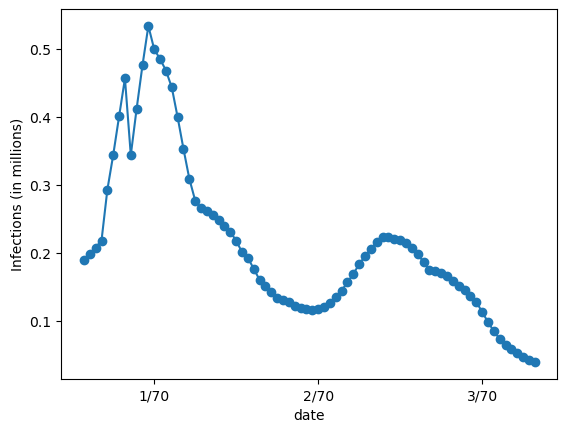

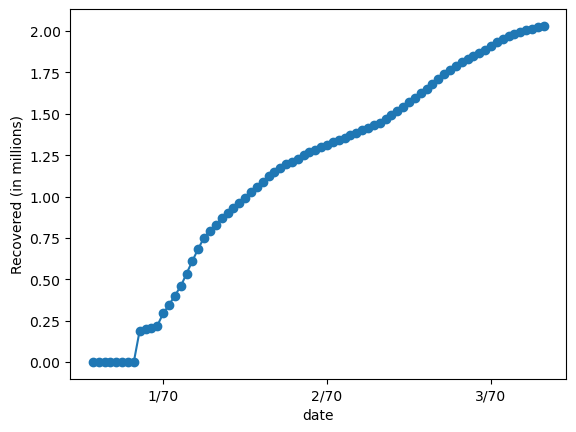

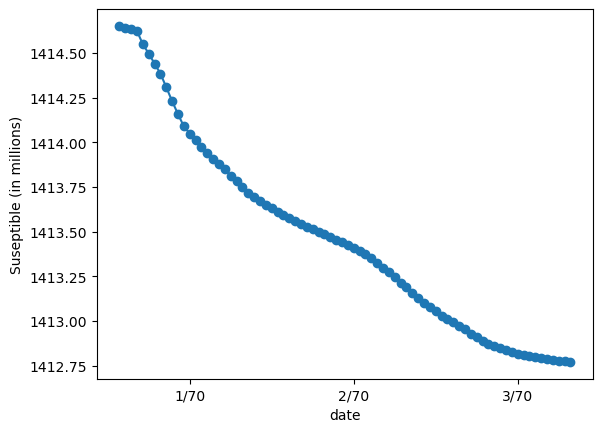

In [1]:
## LOAD YOUR DATASET HERE.
import numpy as np, pandas as pd
from datetime import datetime, timedelta
from main_functions import convert_cumulative_to_SIR

# 1. Read in the csv file of cumulative cases.
N = 1414840838/1e6  # China population in millions
df_full = pd.read_csv("/Users/porterjurica/Desktop/BME 2315/Module 4/covid_china_data_spring_2022_cumulative.csv")
df_full['confirmed_cases'] = df_full['confirmed_cases'] / 1e6  # convert to millions
df_full = df_full[(df_full['date'] <= '2022-05-10')&(df_full['date'] >= '2022-02-22')]
df_full.head()

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
df = convert_cumulative_to_SIR(df_full, population = N)
print(df)

# 3. Plot S, I, R over time.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
    #This plot I 
plt.plot(df_full['date'], df['I_est'], 'o-')
plt.xlabel('date'); plt.ylabel('Infections (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()
    #This plots R
plt.plot(df_full['date'], df['R_est'], 'o-')
plt.xlabel('date'); plt.ylabel('Recovered (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()
    #This plots S
plt.plot(df_full['date'], df['S_est'], 'o-')
plt.xlabel('date'); plt.ylabel('Suseptible (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*
* We first used euler_SIR function to get an SIR model over time
* Plugged in different values of gamma and beta to find the best fit. Found best fit by calculating sum of squared errors. We graphed the actual data vs the one the eulers gave us. 
* Used optimization method by using the minimize scipy.optimize function to minimize the sum of squared error and find the best gamma and beta values. This part also created a graph with the actual data vs the optimized  model. 
* We than did the same thing with just the first half of the data and found the gamma and beta value that minimized SSE. This part also created a graph with the actual data vs the optimized  model. 
* We used the gamma and beta from the first half to predict the second half of the data and than found the SSE for the second half of the data based on the training set from the first part. 

### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

#### 1. Fitting the SIR Model

In [2]:
# Using the euler_SIR function defined earlier, we can simulate the SIR model over time.
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.
def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """
    Solve the SIR model using Euler's method.
    Parameters:
    - beta: Infection rate
    - gamma: Recovery rate
    - S0: Initial susceptible population
    - I0: Initial infected population
    - R0: Initial recovered population
    - t: Array of time points (days or weeks)
    - N: Total population
    Returns:
    - S: Array of susceptible population over time
    - I: Array of infected population over time
    - R: Array of recovered population over time
    """
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]  # dt is our step size (1 day or 1 week)
        dS = (-beta * I[n] * S[n])/N  # FILL IN BASED ON SIR MODEL
        dI = (beta * I[n] * S[n])/N - (gamma * I[n])  # FILL IN BASED ON SIR MODEL
        dR = gamma * I[n]  # FILL IN BASED ON SIR MODEL
        S[n + 1] = S[n] + dS * dt  # FILL IN BASED ON EULER'S METHOD
        I[n + 1] = I[n] + dI * dt  # FILL IN BASED ON EULER'S METHOD
        R[n + 1] = R[n] + dR * dt  # FILL IN BASED ON EULER'S METHOD
    return S, I, R


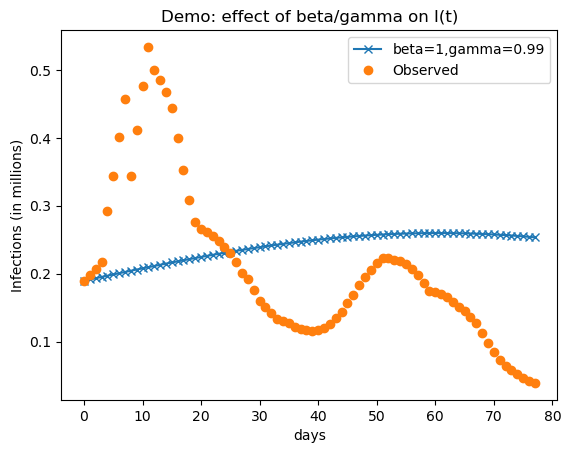

Model 1 SSE: 1.4371e+00


In [3]:
# Plug in guesses for gamma and beta, plot the model predictions against the data, and calculate SSE.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main_functions import convert_cumulative_to_SIR
N = 1414840838/1e6  # China population in millions
df_full = pd.read_csv("/Users/porterjurica/Desktop/BME 2315/Module 4/covid_china_data_spring_2022_cumulative.csv")
df_full['confirmed_cases'] = df_full['confirmed_cases'] / 1e6  # convert to millions
df_full = df_full[(df_full['date'] <= '2022-05-10')&(df_full['date'] >= '2022-02-22')]

df = convert_cumulative_to_SIR(df_full, population = N)
I_obs = df['I_est'].values.astype(float)   # Set up I_obs array from data directly
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs)) # time array in days

I0_obs = I_obs[0]
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs

beta1 = 1 #random guess for beta
gamma1 = 0.99 #random guess for gamma
S1,I1,R1 = euler_sir(beta1, gamma1,S0_obs, I0_obs, R0_obs, t_obs, N)

plt.plot(t_obs, I1, label=f'beta={beta1},gamma={gamma1}', marker='x')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

print(f"Model 1 SSE: {np.sum((I1 - I_obs)**2):.4e}")


Optimal Beta (β): 1.0000
Optimal Gamma (γ): 0.9987
Minimum SSE: 9.9311e-01


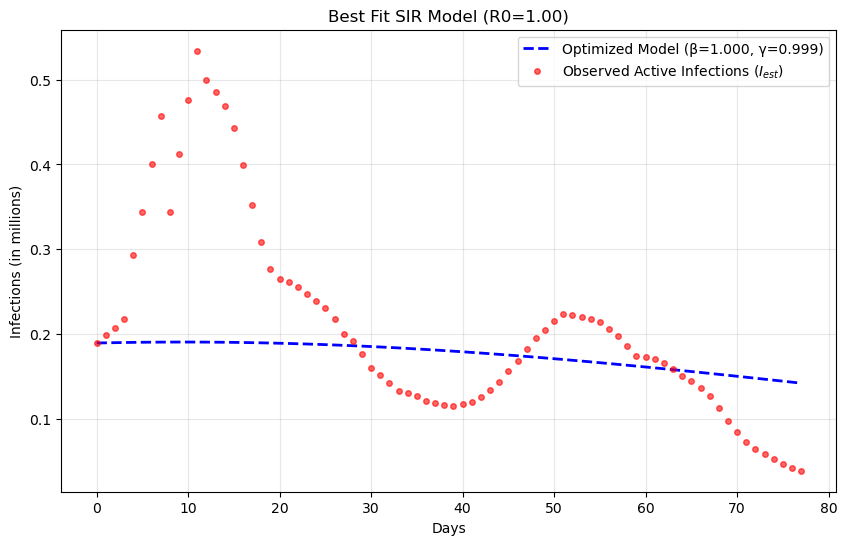

In [4]:
# Use an optimization routine to minimize SSE and find the best-fitting parameters.
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def calculate_sse(params):# calculate SSE
    beta, gamma = params    
    S_model, I_model, R_model = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, N)
    sse = np.sum((I_model - I_obs)**2)
    
    return sse

initial_guess = [0.25, 0.20] 
bounds = [(0.0, 1.0), (0.0, 1.0)] 

optimization_result = minimize(
    calculate_sse, 
    initial_guess, 
    method='L-BFGS-B', 
    bounds=bounds
)

beta_opt, gamma_opt = optimization_result.x
sse_opt = optimization_result.fun

print(f"Optimal Beta (β): {beta_opt:.4f}")
print(f"Optimal Gamma (γ): {gamma_opt:.4f}")
print(f"Minimum SSE: {sse_opt:.4e}")

S_opt, I_opt, R_opt = euler_sir(beta_opt, gamma_opt, S0_obs, I0_obs, R0_obs, t_obs, N)

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(t_obs, I_opt, label=f'Optimized Model (β={beta_opt:.3f}, γ={gamma_opt:.3f})', 
         color='blue', linestyle='--', linewidth=2)
plt.plot(t_obs, I_obs, 'o', label='Observed Active Infections ($I_{est}$)', 
         color='red', markersize=4, alpha=0.6)

plt.legend()
plt.xlabel('Days')
plt.ylabel('Infections (in millions)')
plt.title(f'Best Fit SIR Model (R0={beta_opt/gamma_opt:.2f})')
plt.grid(True, alpha=0.3)
plt.show()

#### 2. Predict "the future" with your fit SIR model

Minimum SSE: 8.3058e-01


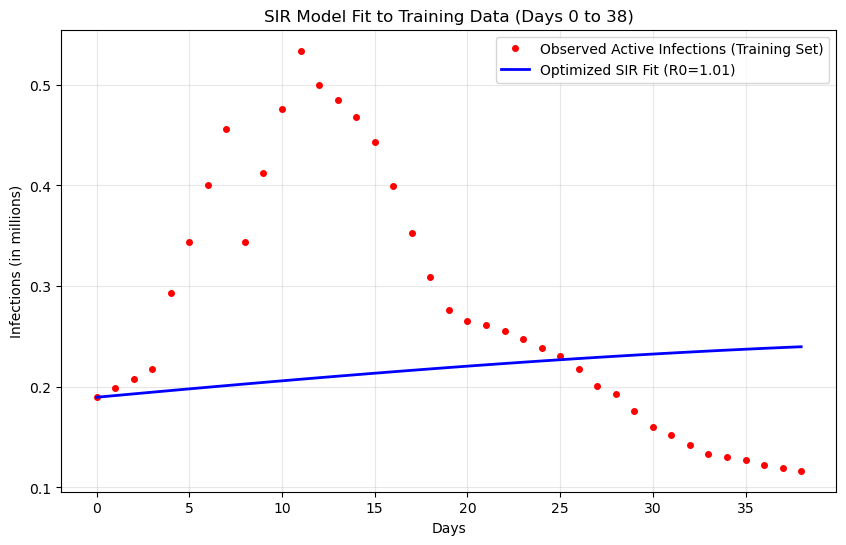

Optimized beta:  1.000000
Optimized gamma: 0.990946
Optimized R0:    1.009137


In [5]:
# Calculate with training data only (first half)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from main_functions import convert_cumulative_to_SIR

# Define the euler_sir function (from your previous code)
def euler_sir(beta, gamma, S0, I0, R0, t, N):
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)
    S[0], I[0], R[0] = S0, I0, R0
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]
        dS = (-beta * I[n] * S[n])/N
        dI = (beta * I[n] * S[n])/N - (gamma * I[n])
        dR = gamma * I[n]
        S[n + 1] = S[n] + dS * dt
        I[n + 1] = I[n] + dI * dt
        R[n + 1] = R[n] + dR * dt
    return S, I, R

# 1. Data Loading and Preparation
N = 1414840838/1e6  # China population in millions
# NOTE: File path must be valid in your environment
df_full = pd.read_csv("/Users/porterjurica/Desktop/BME 2315/Module 4/covid_china_data_spring_2022_cumulative.csv")
df_full['confirmed_cases'] = df_full['confirmed_cases'] / 1e6  # convert to millions
df_full = df_full[(df_full['date'] <= '2022-05-10')&(df_full['date'] >= '2022-02-22')]

df = convert_cumulative_to_SIR(df_full, population = N)
I_obs_full = df['I_est'].values.astype(float)   
t_obs_full = np.linspace(0, len(I_obs_full)-1, len(I_obs_full)) 

# 2. Split Data into Training (First Half)
half_point = len(I_obs_full) // 2

# Training Data (Used for Optimization)
I_obs_train = I_obs_full[:half_point]
t_obs_train = t_obs_full[:half_point]

# Full Time Range is no longer needed for plotting

# Initial Conditions (from the start of the entire data set)
I0_obs = I_obs_full[0]
R0_obs = df['R_est'].values.astype(float)[0] # Use estimated R0 for better initialization
S0_obs = N - I0_obs - R0_obs


# 3. Define the Objective Function (SSE) for Optimization
def calculate_sse(params):
    """Calculates the Sum of Squared Errors (SSE) only for the training set."""
    beta, gamma = params
    if beta < 0 or gamma < 0:
        return np.inf
        
    S_model, I_model, R_model = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs_train, N)
    
    # Calculate the SSE against the training observed data
    sse = np.sum((I_model - I_obs_train)**2)
    
    return sse

# 4. Run Optimization on Training Data
initial_guess = [0.4, 0.2]
bounds = [(0.0, 1.0), (0.0, 1.0)] 

optimization_result = minimize(
    calculate_sse, 
    initial_guess, 
    method='L-BFGS-B', 
    bounds=bounds
)

beta_opt, gamma_opt = optimization_result.x
R0_opt = beta_opt / gamma_opt

print(f"Minimum SSE: {optimization_result.fun:.4e}") 


# 5. Simulate the Model over the TRAINING Time Range ONLY
# I_train_fit will be the model's best fit curve for the first half of the data
S_train_fit, I_train_fit, R_train_fit = euler_sir(
    beta_opt, gamma_opt, S0_obs, I0_obs, R0_obs, t_obs_train, N
)

# 6. Plot the Training Fit
plt.figure(figsize=(10, 6))

# Plot the Observed Training Data (First Half)
plt.plot(t_obs_train, I_obs_train, 'o', label='Observed Active Infections (Training Set)', color='red', markersize=4)

# Plot the Model Fit over the Training Data (First Half)
plt.plot(t_obs_train, I_train_fit, '-', label=f'Optimized SIR Fit (R0={R0_opt:.2f})', color='blue', linewidth=2)

plt.legend()
plt.xlabel('Days')
plt.ylabel('Infections (in millions)')
plt.title(f'SIR Model Fit to Training Data (Days 0 to {t_obs_train[-1]:.0f})')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimized beta:  {beta_opt:.6f}")
print(f"Optimized gamma: {gamma_opt:.6f}")
print(f"Optimized R0:    {R0_opt:.6f}")


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

For the full data set the optimal beta was 1.000 and optimal gamma was 0.9987 and the minimum SSE was 9.9311E-1. 

For the first half of the data set, the optimal beta was 1, the gamma was 0.990946 and the minimum SSE was 8.3058E-01.

The gamma and beta values were very close to eachother as the beta was the same and the gamma was basically the same. However the half data set was a better fit as the sum of squared errors was smaller. 


In [6]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.
# Extract second half of the data
I_obs_test = I_obs_full[half_point:]
t_obs_test = t_obs_full[half_point:]

# Initial conditions for SECOND HALF should be the last values of the training simulation
S0_test = S_train_fit[-1]
I0_test = I_train_fit[-1]
R0_test = R_train_fit[-1]

# Run SIR model on the second half time range
S_test_fit, I_test_fit, R_test_fit = euler_sir(
    beta_opt, gamma_opt, S0_test, I0_test, R0_test, t_obs_test, N
)

# Compute SSE for second half
sse_test = np.sum((I_test_fit - I_obs_test)**2)

print(f"SSE on Second Half (Test Set): {sse_test:.4e}")


SSE on Second Half (Test Set): 5.0037e-01



<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

Eulers is a first order integration while midpoint is a second order making it one order of magnitude more accurate. If it is more accurate than the difference between the model and the actual value will decrease making the SSE decrease. 

#### 3. Decreasing numerical error with the RK4 Method

---- RK45 OPTIMIZATION RESULTS ----
Optimal β: 1.000000
Optimal γ: 0.998591
R0 = β/γ = 1.001
SSE = 9.9344e-01


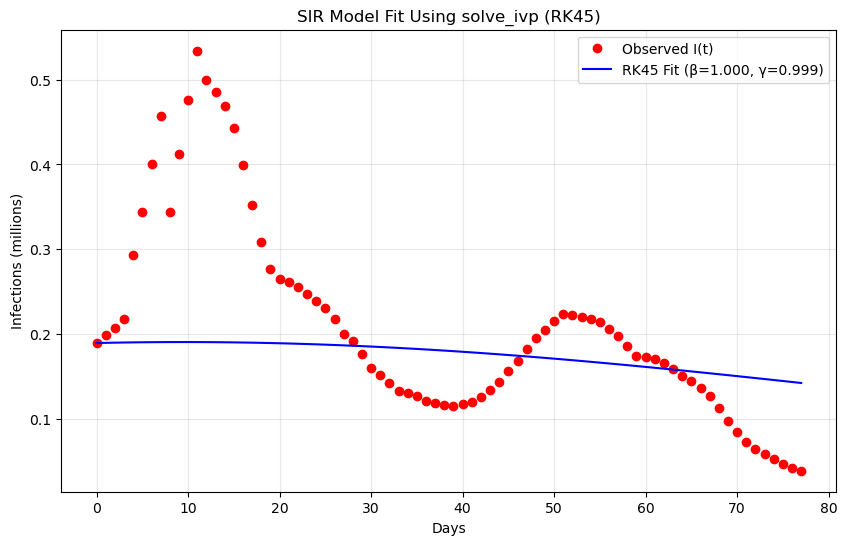

In [7]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


# 1. Define SIR differential equations for solve_ivp
def sir_rhs(t, y, beta, gamma, N):
   S, I, R = y
   dSdt = -beta * S * I / N
   dIdt = beta * S * I / N - gamma * I
   dRdt = gamma * I
   return [dSdt, dIdt, dRdt]


# 2. Wrapper to simulate SIR using solve_ivp (RK solver)
def rk_sir(beta, gamma, S0, I0, R0, t_eval, N):
   sol = solve_ivp(
       fun=lambda t, y: sir_rhs(t, y, beta, gamma, N),
       t_span=(t_eval[0], t_eval[-1]),
       y0=[S0, I0, R0],
       t_eval=t_eval,
       method='RK45'
   )
   return sol.y  # returns (S, I, R)


# Observed
I_obs = df['I_est'].values.astype(float)
t_obs = np.linspace(0, len(I_obs)-1, len(I_obs))


# Initial conditions
I0 = I_obs[0]
R0 = df['R_est'].values.astype(float)[0]
S0 = N - I0 - R0


def sse_rk(params):
   beta, gamma = params
   if beta < 0 or gamma < 0:
       return np.inf


   S_pred, I_pred, R_pred = rk_sir(beta, gamma, S0, I0, R0, t_obs, N)
   return np.sum((I_pred - I_obs)**2)


# Optimization
initial_guess = [0.3, 0.2]
bounds = [(0, 1), (0, 1)]


result = minimize(
   sse_rk,
   initial_guess,
   bounds=bounds,
   method='L-BFGS-B'
)


beta_rk, gamma_rk = result.x
R0_rk = beta_rk / gamma_rk


print("---- RK45 OPTIMIZATION RESULTS ----")
print(f"Optimal β: {beta_rk:.6f}")
print(f"Optimal γ: {gamma_rk:.6f}")
print(f"R0 = β/γ = {R0_rk:.3f}")
print(f"SSE = {result.fun:.4e}")


# -------------------------------
# Plot RK45 SIR model vs data
# -------------------------------
S_rk, I_rk, R_rk = rk_sir(beta_rk, gamma_rk, S0, I0, R0, t_obs, N)


plt.figure(figsize=(10,6))
plt.plot(t_obs, I_obs, 'o', label='Observed I(t)', color='red')
plt.plot(t_obs, I_rk, '-', label=f'RK45 Fit (β={beta_rk:.3f}, γ={gamma_rk:.3f})', color='blue')


plt.xlabel("Days")
plt.ylabel("Infections (millions)")
plt.title("SIR Model Fit Using solve_ivp (RK45)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?

RK4 did not do a better job than the original method using Euler's method. This is supported by the increased SSE when using RK4, as this model achieved a SSE of 9.9344e-01 while Euler's method achieved a SSE of 8.3058e-01.

---- RK45 Trained on First Half ----
Optimal β: 1.000000
Optimal γ: 0.990861
SSE on training set: 8.3023e-01
SSE on second half (test set): 5.0077e-01


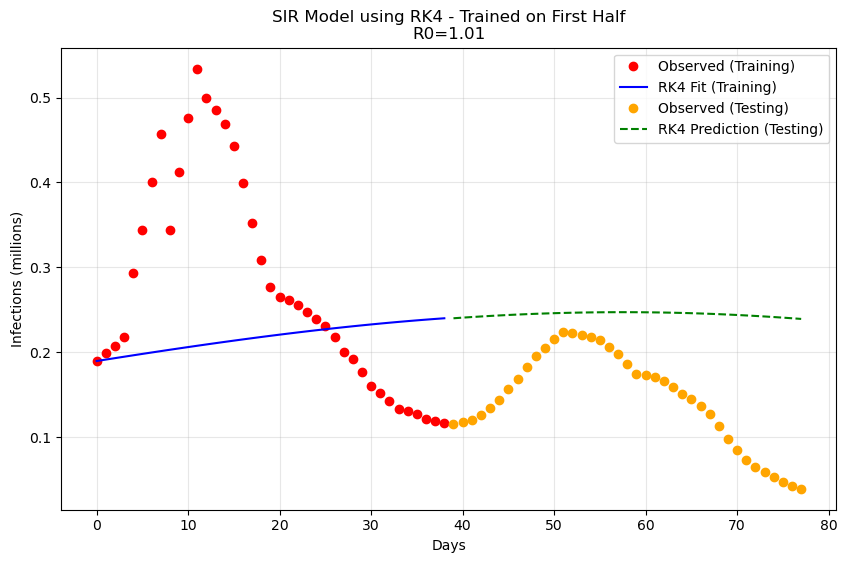

In [8]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


# SIR equations for RK4
def sir_rhs(t, y, beta, gamma, N):
   S, I, R = y
   dSdt = -beta * S * I / N
   dIdt = beta * S * I / N - gamma * I
   dRdt = gamma * I
   return [dSdt, dIdt, dRdt]


def rk_sir(beta, gamma, S0, I0, R0, t_eval, N):
   sol = solve_ivp(
       fun=lambda t, y: sir_rhs(t, y, beta, gamma, N),
       t_span=(t_eval[0], t_eval[-1]),
       y0=[S0, I0, R0],
       t_eval=t_eval,
       method='RK45'
   )
   return sol.y  # returns S, I, R arrays


# SPlit data into training set
half_point = len(I_obs_full) // 2


# Training set (first half)
I_train = I_obs_full[:half_point]
t_train = t_obs_full[:half_point]


# Testing set (second half)
I_test = I_obs_full[half_point:]
t_test = t_obs_full[half_point:]
# Initial conditions at start of first half
I0_train = I_train[0]
R0_train = df['R_est'].values.astype(float)[0]
S0_train = N - I0_train - R0_train


# Find optimal beta and gamma using only training data
def sse_rk_train(params):
   beta, gamma = params
   if beta < 0 or gamma < 0:
       return np.inf
   S_pred, I_pred, R_pred = rk_sir(beta, gamma, S0_train, I0_train, R0_train, t_train, N)
   return np.sum((I_pred - I_train)**2)


initial_guess = [1, 0.99]
bounds = [(0, 1), (0, 1)]


result = minimize(sse_rk_train, initial_guess, bounds=bounds, method='L-BFGS-B')


beta_rk_train, gamma_rk_train = result.x
R0_rk_train = beta_rk_train / gamma_rk_train
print("---- RK45 Trained on First Half ----")
print(f"Optimal β: {beta_rk_train:.6f}")
print(f"Optimal γ: {gamma_rk_train:.6f}")
print(f"SSE on training set: {result.fun:.4e}")


# predict on second half using trained parameters
S_train_pred, I_train_pred, R_train_pred = rk_sir(beta_rk_train, gamma_rk_train, S0_train, I0_train, R0_train, t_train, N)


S0_test = S_train_pred[-1]
I0_test = I_train_pred[-1]
R0_test = R_train_pred[-1]


S_test_pred, I_test_pred, R_test_pred = rk_sir(beta_rk_train, gamma_rk_train, S0_test, I0_test, R0_test, t_test, N)


sse_test = np.sum((I_test_pred - I_test)**2)
print(f"SSE on second half (test set): {sse_test:.4e}")


#plot results

plt.figure(figsize=(10,6))


# Training fit
plt.plot(t_train, I_train, 'o', label='Observed (Training)', color='red')
plt.plot(t_train, I_train_pred, '-', label='RK4 Fit (Training)', color='blue')


# Testing prediction
plt.plot(t_test, I_test, 'o', label='Observed (Testing)', color='orange')
plt.plot(t_test, I_test_pred, '--', label='RK4 Prediction (Testing)', color='green')


plt.xlabel("Days")
plt.ylabel("Infections (millions)")
plt.title(f"SIR Model using RK4 - Trained on First Half\nR0={R0_rk_train:.2f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



Best-fit beta  = 1.000000
Best-fit gamma = 0.998589
Best-fit omega = 0.000000
Minimum SSE (SIRS) = 9.934033e-01


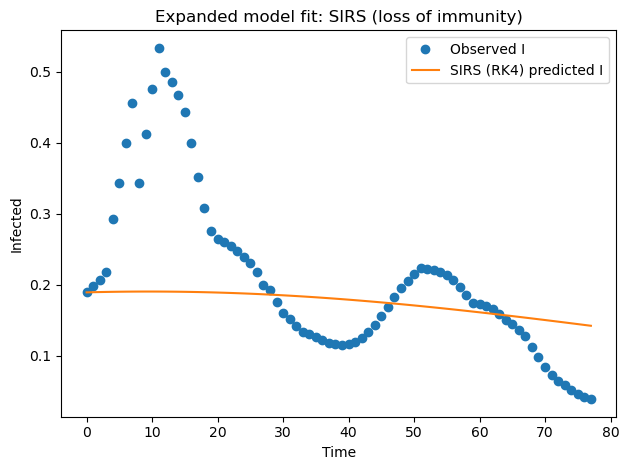

In [18]:
# Extended model implementation, parameter fitting, and plotting.

#Adding in a new parameter for loss of immunity

# SIRS equations for RK4
def sirs_rhs(y, beta, gamma, omega, N):
   S, I, R = y
   dSdt = -beta * S * I / N + omega * R
   dIdt = beta * S * I / N - gamma * I
   dRdt = gamma * I - omega * R
   return np.array([dSdt, dIdt, dRdt], dtype=float)

def rk4_sirs(beta, gamma, omega, S0, I0, R0, t_eval, N):
    t_eval = np.asarray(t_eval, dtype=float)
    y = np.zeros((len(t_eval), 3), dtype=float)
    y[0] = [S0, I0, R0]

    for k in range(len(t_eval) - 1):
        dt = t_eval[k+1] - t_eval[k]
        yk = y[k]

        k1 = sirs_rhs(yk, beta, gamma, omega, N)
        k2 = sirs_rhs(yk + 0.5 * dt * k1, beta, gamma, omega, N)
        k3 = sirs_rhs(yk + 0.5 * dt * k2, beta, gamma, omega, N)
        k4 = sirs_rhs(yk + dt * k3, beta, gamma, omega, N)

        y[k+1] = yk + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)

    S_pred, I_pred, R_pred = y.T
    return S_pred, I_pred, R_pred

def sse_sirs(parameters):
    beta, gamma, omega = parameters
    if beta <0 or gamma <0 or omega<0:
        return np.inf
    
    S_pred, I_pred, R_pred = rk4_sirs(beta, gamma, omega, S0, I0, R0, t_obs, N)
    return np.sum((I_pred-I_obs)**2)

initial_guess = [0.25, 0.20, 0.01]
bounds = ((0.0, 1.0), (0.0,1.0), (0.0, 0.2))

result = minimize(sse_sirs, initial_guess, bounds=bounds, method = "L-BFGS-B")
beta_hat, gamma_hat, omega_hat = result.x
S_pred, I_pred, R_pred = rk4_sirs(beta_hat, gamma_hat, omega_hat, S0_obs, I0_obs, R0_obs, t_obs, N)
SSE_SIRS = np.sum((I_pred - I_obs)**2)

print(f"Best-fit beta  = {beta_hat:.6f}")
print(f"Best-fit gamma = {gamma_hat:.6f}")
print(f"Best-fit omega = {omega_hat:.6f}")
print(f"Minimum SSE (SIRS) = {SSE_SIRS:.6e}")

plt.figure()
plt.plot(t_obs, I_obs, marker='o', linestyle='None', label='Observed I')
plt.plot(t_obs, I_pred, linestyle='-', label='SIRS (RK4) predicted I')
plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Expanded model fit: SIRS (loss of immunity)")
plt.legend()
plt.tight_layout()
plt.show()

This expanded model uses the RK4 solver and implements the additional parameter of the rate of loss of immunity. This model (SIRS) generated a greater SSE than the basic SIR model, which indicates that immunity loss is not strongly identifiable over the smaller duration of the dataset. Though the model introduced the additional parameter, the increased model complexity is not justified by the SSE increase.

## Verify and validate your analysis: 

For our model we verified it with our graphs and fitting the beta and gamma values with the I(t) or the actual observed infections to see how close the two graphs were towards eachother. We also implemented the SIR using both Eulers and Runge Kutta. As both produced basically the same gamma and beta values of a beta of 1 and a gamma of 0.99. We also did a train test split to model it to the first half and than used it to predict the second test. The SSE was pretty low of it being 5.0077e-01. Additionally we added a parameter of loss of immunity and did a SIRS model to also improve the SSE however the beta and gamma values still remained the same indicating even if the graphs are not exact, we did the most we could with the model given.

For validation we found that our R0 value was 1.01 and according to the paper from the NIH, the COVID R0 was around 1.5-6.68 meaning that our model to minimize SSE did have a slightly lower R0 than what is expected from COVID. However this paper is from 2020 when COVID was rapidly spreading and the data we were modeling was from 2022 which could explain the difference. https://pmc.ncbi.nlm.nih.gov/articles/PMC7751056/

https://pmc.ncbi.nlm.nih.gov/articles/PMC7303028/: This paper from the NIH is about why modeling COVID_19 is hard to do. There is unknown knowledge of immmunity duration, underreported prevalance, and changing policy interventions which makes minimizing error and coming up with a super accurate model is hard which is why with different methods we kind of just had the same gamma and beta due to the high rise in the beginnning.






## Conclusions and Ethical Implications: 

Through multiple modeling approaches, the SIR framework generally illustrates the trend of COVID-19 infection dynamics in China in 2022 with some limitations. Parameter fitting using Euler's method and the RK4 solver produced very similar values for beta and gamma, indicating that numerical integration error was not the primary source of model and data discrepancies. While the RK4 solver model should theoretically be more accurate, it did not consistently reduce SSE in comparison to the Euler's model. This outcome reinforces that model structure primarily limits performance as opposed to numerical methods. Additionally, model fitting on only half of the dataset also produced lower SSE than fitting the full dataset. This highlights that these methods have limited predictive power and should be utilized thoughtfully.

These results emphasize the need for caution during interpretation and analysis using more simple epidemiological models. Even if models can appear to accurately fit historical data, their accuracy during predictions may be limited especially when basic assumptions like homogenous mixing and constant parameters are not met in real life. Overreliance on models like these for policy decisions without acknowledgement of uncertainty can lead to public health interventions that are not effective or worse, harmful. This emphasizes the need and responsibility of accurate and transparent communication of model limitations.

## Limitations and Future Work: 

Our analysis is limited by the use of a fairly simple model that is applied to a shorter window of time for a relatively complex and constantly evolving pandemic. The SIR model assumes constant rates of disease transmission and recovery, which definitely vary because of public health interventions, societal behaviors, and infection reporting practices. Although numerical accuracy was improved using the RK4 solver method, the primary errors can be attributed to structural simplifications as opposed to integration methods. The extended SIRS model that added the loss of immunity rate did not improve the model fit and actually resulted in a higher SSE, which suggests that reinfection dynamics are not particularly distinguishable with the data we used.

Future work could utilize longer time spans or data with multiple epidemic waves to better evaluate reinfection and loss of immunity. Expanding the model in other ways to include additional information like exposed individuals or age-classified populations can also improve real-world reliability because the model can more accurately encompass true disease behavior. Additionally, future modeling attempts should work to balance model complexity with availability of data to avoid model overfitting. This will make sure that any conclusions remain scientifically and ethically reliable.

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*
* Checkpoint 1: We completed the data set section and the background section for the COVID 2022 data
* Checkpoint 2: Used SIR model to fit the data using Eulers and did a minimization technique to minimize SSE. Finished the data set section. 

## QUESTIONS FOR YOUR TA: 
No questions at this time